# Introduzione e riferimenti
In questa sezione sono spiegate le principali scelte compiute e sono citati i riferimenti. Nel corso del lavoro e delle implementazioni sono documentate tutte le componenti del sistema costruito ed inoltre sono stampati a schermo alcuni passaggi così da vedere come procede l'elaborazione del flusso di dati.



**Riferimento principale**: Dalal, N., & Triggs, B. (2005). Histograms of oriented gradients for human detection. CVPR.<br>

**Dataset**<br>
Per gli esempi positivi (volti) è stato scelto Workspace_lfw_people da Scikit-learn perchè è facile da usare e contiene immagini di volti ritagliate. Per quanto riguarda, invece, gli esempi negativi (non-volti), sono stati creati estraendo patch casuali da immagini generiche scaricate da url e, come fallback, da skimage.data.<br>
L'idea di usare patch casuali da immagini come negativi è una pratica comune quando non si dispone di un dataset specifico.

**HOG (histogram of oriented gradients)**
È l'algoritmo cardine di questo lavoro ed è stato scelto per la sua efficacia nel descrivere forme basate su gradienti, per la sua relativa invarianza a cambiamenti di illuminazione e per la sua efficienza computazionale rispetto a metodi più complessi (deep learning).<br>
Riferimento: Dalal, N., & Triggs, B. (2005). Histograms of oriented gradients for human detection. CVPR.

**Modello di classificazione**
LinearSVC (Linear Support Vector Classifier) è stato scelto come modello di classificazione data la sua efficienza con feature ad alta dimensionalità (come HOG) e per le buone performance generalizzate. È difatti adatto per sistemi con risorse limitate.<br>
L'uso di SVM lineari con HOG è un approccio classico e ben documentato in letteratura per la rilevazione di oggetti.

**Image pyramid**<br>
Questa è la tecnica scelta ed implementata per la gestione della rilevazione di volti a diverse scale.<br>
Il parametro scale_factor controlla il passo tra le scale.

**Sliding window**<br>
È un approccio standard per la rilevazione di oggetti (e volti) in cui un classificatore analizza piccole porzioni (finestre) dell'immagine.<br>
Il parametro step_size risulta cruciale per il trade-off tra accuratezza e velocità.

**Non-maximum suppression (NMS)**<br>
Questo algoritmo è essenziale per unire rilevazioni multiple e sovrapposte dello stesso volto basandosi sugli score del classificatore e sulla sovrapposizione (IoU).<br>
Nell'applicazione di questa metodologia, la decision_function dell'SVM fornisce uno score e poi una soglia su questo score permette di controllare il trade-off tra falsi positivi e falsi negativi.
Riferimento: Neubeck, A., & Van Gool, L. (2006). Efficient non-maximum suppression. ICPR.

**Osservazione**<br>
Il rilevatore costruito, intrinsecamente, non è invariante alla rotazione nel piano dell'immagine.

**Ricerca bibliografica**<br>
- Per HOG<br>
Dalal, N., & Triggs, B. (2005). Histograms of oriented gradients for human detection. IEEE Conference on Computer Vision and Pattern Recognition (CVPR).
- Per SVM<br>
Cortes, C., & Vapnik, V. (1995). Support-vector networks. Machine learning.
- Approccio classico per face detection<br>
Viola, P., & Jones, M. (2001). Rapid object detection using a boosted cascade of simple features. IEEE CVPR.
- Un lavoro influente su HOG e sui modelli deformabili<br>
Felzenszwalb, P. F., Girshick, R. B., McAllester, D., & Ramanan, D. (2009). Object detection with discriminatively trained part-based models. IEEE Transactions on Pattern Analysis and Machine Intelligence (TPAMI).
- Per NMS<br>
Neubeck, A., & Van Gool, L. (2006). Efficient non-maximum suppression. International Conference on Pattern Recognition (ICPR).

# 1 Import librerie e costanti globali
In questa sezione viene preparato l'ambiente di lavoro importando tutte le librerie e funzioni necessarie per costruire, addestrare e valutare il sistema di rilevamento volti. Inoltre vengono definiti i parametri fondamentali per l'estrazione delle caratteristiche HOG (Histogram of Oriented Gradients) da patch di immagini e viene calcolata la dimensione del vettore di caratteristiche HOG risultante:
- PATCH_SIZE<br>
Dimensione standard (altezza e larghezza) in pixel delle porzioni di immagine (patch) che verranno analizzate. Il sistema cercherà volti o non-volti in patch di questa dimensione.
- HOG_ORIENTATIONS<br>
Numero di bin di orientamento dei gradienti. Per ogni cella dell'immagine verrà calcolato un istogramma dei gradienti e tali gradienti sono raggruppati in diverse direzioni principali.
- HOG_PIXELS_PER_CELL<br>
Dimensione in pixel di ogni cella. La patch viene suddivisa in celle più piccole, e per ognuna di queste verrà calcolato un istogramma degli orientamenti dei gradienti.
- HOG_CELLS_PER_BLOCK<br>
Numero di gruppi di celle che formano un blocco. I blocchi verranno usati per la normalizzazione del contrasto locale, il che rende le feature HOG più robuste a variazioni di illuminazione.
- HOG_FEATURE_SIZE<br>
Lunghezza totale del vettore di caratteristiche HOG che verrà estratto da una singola patch di PATCH_SIZE

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

Dimensione della patch: (80, 80)
Dimensione attesa del vettore di caratteristiche HOG: 2916


# 2 Costruzione funzioni utili
In questa sezione vengono costruite le funzioni load_positive_samples, download_image, get_random_patches e load_negative_samples. Queste saranno utili a fornire le patch di immagini grezze, che saranno poi l'input per la pipeline.<br>

Per addestrare un classificatore di volti, sono necessari campioni positivi (che contengono volti) e negativi (che non contengono volti). Quindi verrà usato il dataset Labeled Faces in the Wild (LFW) per i campioni positivi, disponibile tramite Scikit-learn, invece per i campioni negativi verranno scaricate alcune immagini generiche da internet che non contengono volti e da cui saranno estratte patch casuali.

### 2.1 load_positive_samples
Questa funzione ha lo scopo di caricare e preparare i campioni di immagini che contengono volti (campioni positivi). Tali campioni verranno usati per addestrare il modello nel riconoscimento di un volto.

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

### 2.2 download_image
Questa funzione è utile per scaricare un'immagine da un indirizzo web (url) specificato.

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

### 2.3 get_random_patches
Questa funzione estrae un numero specificato di piccole porzioni (patch) casuali da un'immagine più grande. Inoltre, tali patch sono prese casualmente ed in scala di grigi da immagini più grandi. Questa funzione sarà utile, ad esempio, per generare campioni negativi per l'addestramento del classificatore.

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

### 2.4 load_negative_samples
Questa funzione ha il compito di raccogliere un set di campioni negativi, ovvero patch di immagini che non contengono volti. Tali campioni saranno essenziali per addestrare il modello a distinguere correttamente tra ciò che è un volto e ciò che non lo è. Questa funzione è progettata per essere robusta nel raccogliere un dataset diversificato e scelto di campioni negativi.<br>
più precisamente, l'obiettivo è quello di raccogliere un numero specificato (num_target_patches, di default 2000) di piccole patch di immagini (della dimensione patch_size_tuple, che è definita globalmente come PATCH_SIZE) che non contengano volti umani. Queste patch serviranno come esempi di non-volto durante l'addestramento del classificatore. Per fare ciò vengono usate due fonti:una fonte primaria (url) ed una fonte di fallback (skimage.data).<br>
<br>
Osservazione sull'azione della fonte di fallback: se non riesce a ottenere abbastanza patch dagli url (ad esempio, a causa di errori di download o perché le immagini non sono adatte), utilizza un set di immagini standard fornite dalla libreria skimage.data (come data.camera(), data.coffee(), data.brick(), ecc.).

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

# 3 Caricamento esempi, creazione classe HOGTransformer, costruzione datasetcompleto e dei set di training e test
In questa sezione vengono fatte diverse operazioni cruciali:
1. vengono caricati gli esempi positivi (immagini di volti) e negativi (immagini senza volti) in modo che ci sia un numero bilanciato di entrambi.
2. viene definita una classe chiamata HOGTransformer. Tale classe è progettata per essere utilizzata all'interno di una pipeline di Scikit-learn come un trasformatore personalizzato ed il suo scopo principale è quello di estrarre le caratteristiche HOG (Histogram of Oriented Gradients) da un insieme di patch di immagini.
Dunque, la classe HOGTransformer incapsula la logica per l'estrazione delle caratteristiche HOG in un formato compatibile e funzionale con le pipeline di Scikit-learn.
3. Si effettua la preparazione dei dati (patch di immagini e le loro etichette) per il successivo addestramento. Più precisamente viene prima "assemblato" il dataset completo e poi viene "splittato" in training test e test set


### 3.1 Caricamento esempi

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

Caricamento di circa 1500 campioni positivi (volti)...
Caricati 1140 campioni positivi.
Caricamento di circa 1140 campioni negativi (non-volti)...
Download per negativi da: https://images.pexels.com/photos/257360/pexels-photo-257360.jpeg
  Estratte 47 patch. Totale negativi: 47
Download per negativi da: https://images.pexels.com/photos/326055/pexels-photo-326055.jpeg
  Estratte 47 patch. Totale negativi: 94
Download per negativi da: https://images.pexels.com/photos/417074/pexels-photo-417074.jpeg
  Estratte 47 patch. Totale negativi: 141
Download per negativi da: https://images.pexels.com/photos/1108099/pexels-photo-1108099.jpeg
  Estratte 47 patch. Totale negativi: 188
Download per negativi da: https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg
  Estratte 47 patch. Totale negativi: 235
Download per negativi da: https://images.pexels.com/photos/3408744/pexels-photo-3408744.jpeg
  Estratte 47 patch. Totale negativi: 282
Download per negativi da: https://images.pexels

### 3.2 Transformer HOG

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

### 3.3 Dataset completo e divisione in training set e test set

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################


Forma dataset completo patches (X_data_patches): (2280, 80, 80)
Forma dataset completo etichette (y_data_labels): (2280,)
Distribuzione etichette: Volti (1): 1140, Non-Volti (0): 1140

Dimensioni training set - patches: (1710, 80, 80), Labels: (1710,)
Dimensioni test set - patches: (570, 80, 80), Labels: (570,)


# 4 Pipeline e modelli
Questa sezione è suddivisa in due parti.<br>
Nella prima parte viene definita, addestrata e valutata una pipeline di Scikit-learn di per la classificazione delle patch di immagini (come "volto" o "non-volto").<br>
La valutazione è fatta presentando:<br>
- Metriche di valutazione del modello
- Matrice di confusione
- Learning curve usando accuracy come metrica di riferimento

Nella seconda parte viene implementato il fine tuning (usando la f1_weighted come metrica di riferimento dato il problema di classificazione) in cui viene aggiornato il modello con il miglior modello con i parametri tunati. Poi viene rilanciata la valutazione (il codice sarà lo stesso ma la variabile che contiene il modello sarà aggiornata).
<br>
<br>
OSSERVAZIONE: date le eccellenti performance, sono state testate diverse learning curves usando diverse metriche di riferimento per verificare l'assenza di overfitting. Effettivamente in tutti i casi le funzioni sono convergenti e con scores elevati.

### 4.1 Pipeline, addestramento e valutazione (modello base)

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################


Addestramento della pipeline (HOG + LinearSVC)...
  HOGTransformer: trasformazione di 1710 patch...
  HOGTransformer: caratteristiche estratte con forma (1710, 2916)
Addestramento completato.

Valutazione della pipeline di classificazione delle patch sul test set:
  HOGTransformer: trasformazione di 570 patch...
  HOGTransformer: caratteristiche estratte con forma (570, 2916)

Accuracy sul test set: 0.9982

Classification report sul test set:
              precision    recall  f1-score   support

   non-volto       1.00      1.00      1.00       285
       volto       1.00      1.00      1.00       285

    accuracy                           1.00       570
   macro avg       1.00      1.00      1.00       570
weighted avg       1.00      1.00      1.00       570




Matrice di confusione per la pipeline...

Matrice di Confusione (formato array NumPy):
[[285   0]
 [  1 284]]


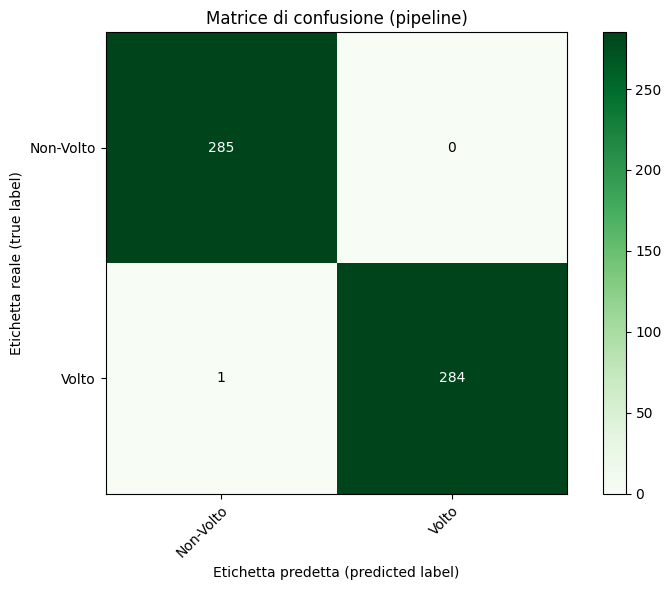


Interpretazione della matrice di confusione:
  Non-Volto (Reale) vs Non-Volto (Predetto) [true negative - TN]: 285
  Non-Volto (Reale) vs Volto (Predetto) [false positive - FP]: 0
  Volto (Reale) vs Non-Volto (Predetto) [false negative - FN]: 1
  Volto (Reale) vs Volto (Predetto) [true positive - TP]: 284


In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################


Costruzione learning curves per 'model_pipeline_trained'...


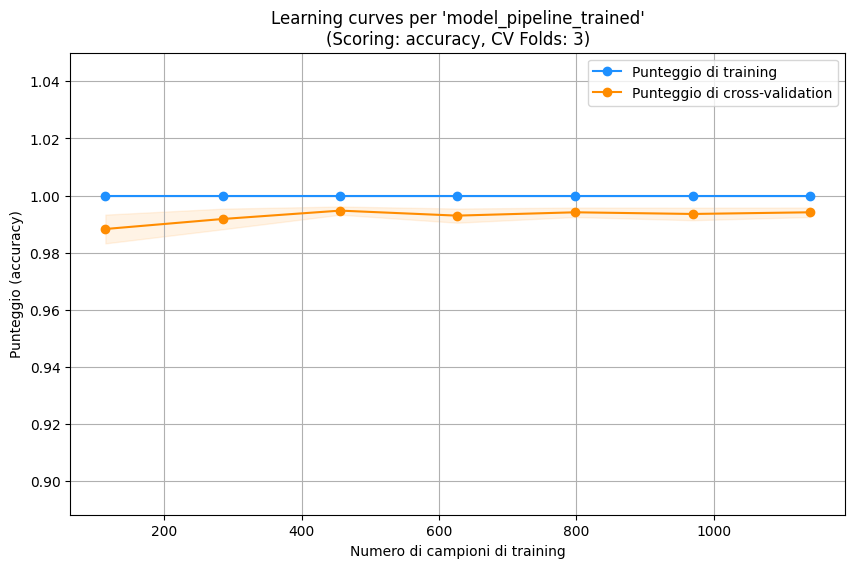

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

### 4.2 Fine tuning e valutazione (miglior modello)

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################


Fine tuning degli iperparametri...

RandomizedSearchCV con 15 iterazioni e 3 fold di CV...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
  HOGTransformer: trasformazione di 1710 patch...
  HOGTransformer: caratteristiche estratte con forma (1710, 5760)

RISULTATI FINE TUNING:
Migliori parametri trovati: {'hog_transformer__block_norm': 'L2-Hys', 'hog_transformer__cells_per_block': (3, 3), 'hog_transformer__orientations': 10, 'hog_transformer__pixels_per_cell': (8, 8), 'hog_transformer__transform_sqrt': False, 'svc_classifier__C': np.float64(26.245800050491326), 'svc_classifier__class_weight': None, 'svc_classifier__loss': 'squared_hinge'}
Miglior punteggio CV (f1_weighted): 0.9942

Valutazione della pipeline ottimizzata sul test set:
  HOGTransformer: trasformazione di 570 patch...
  HOGTransformer: caratteristiche estratte con forma (570, 5760)

Accuracy (pipeline ottimizzata) sul test set: 0.9982

Classification report (pipeline ottimizzata) sul test set:
             


Matrice di confusione per la pipeline...

Matrice di confusione (formato array numpy):
[[285   0]
 [  1 284]]


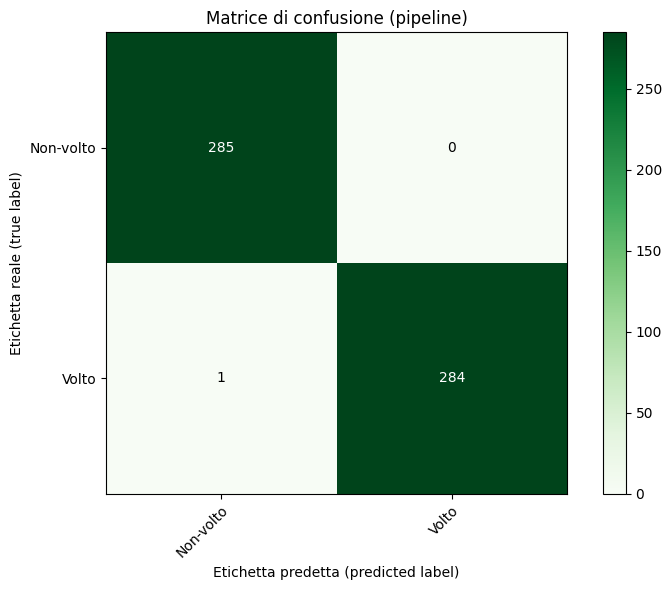


Interpretazione della matrice di confusione:
  Non-volto (Reale) vs Non-volto (Predetto) [true negative - TN]: 285
  Non-volto (Reale) vs Volto (Predetto) [false positive - FP]: 0
  Volto (Reale) vs Non-volto (Predetto) [false negative - FN]: 1
  Volto (Reale) vs Volto (Predetto) [true positive - TP]: 284


In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################


Learning curves per 'model_pipeline_trained'...


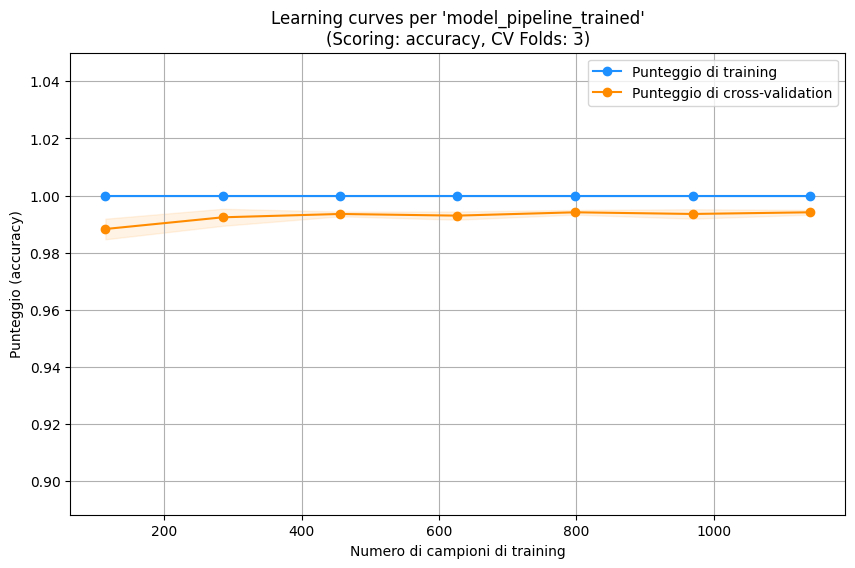

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

# 5 Funzioni per il rilevamento: Image Pyramid, Sliding Window e NMS
In questa sezione vengono definite tre funzioni cruciali che sono componenti fondamentali di molti sistemi di rilevazione di oggetti e di volti. Tali funzioni non dipendono dal modello specifico (HOG+SVM in questo caso) ma forniscono la meccanica per scansionare un'immagine e raffinare le rilevazioni.
<br>
- Image Pyramid<br>
Questa funzione ha lo scopo di generare una "piramide di immagini". L'idea di fondo è quella di creare versioni progressivamente più piccole dell'immagine originale. Ciò permette al rilevatore (che è addestrato per rilevare /volti di una dimensione definita da PATCH_SIZE) di trovare oggetti/volti a diverse scale nell'immagine originale. Senza una piramide, un volto grande potrebbe essere troppo grande per la finestra di rilevamento e un volto piccolo potrebbe essere troppo piccolo e privo di dettagli.
- Sliding Window<br>
Con questa funzione vengono generate "finestre scorrevoli" (patch) di una dimensione fissa (window_size_tuple) che si muovono attraverso un'immagine con un certo passo (step_size_tuple). Questa è una tecnica base per esaminare diverse porzioni di un'immagine.
- Non Maximum Suppression<br>
Quando si usa una finestra scorrevole, è probabile che lo stesso oggetto/un volto venga rilevato più volte con bounding box leggermente diverse e punteggi di confidenza variabili. NMS è una tecnica per eliminare le rilevazioni ridondanti e mantenere solo la bounding box "migliore" per ciascun oggetto.
<br>
<br>
OSSERVAZIONI: (a) nella sostanza, queste funzioni gestiscono la logica di scansione dell'immagine; (b) la funzione extract_hog_features definita globalmente non è più necessaria perché la pipeline si occupa dell'estrazione HOG.

### 5.1 image_pyramid

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

### 5.2 sliding_window

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

### 5.3 non_maximum_suppression

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

# 6 Rilevamento volti
In questa sezione viene definita la funzione principale detect_faces, la quale gestisce l'intero processo di rilevamento dei volti in un'immagine utilizzando la pipeline addestrata e ottimizzata in precedenza.<br>
<br>
Più precisamente, la funzione esegue i seguenti step:
- Preparazione iniziale dell'immagine:<br>
// L'immagine in input viene convertita in scala di grigi.<br>
// Vengono normalizzati i valori di intensità dei pixel dell'immagine in scala di grigi (generalmente tra 0 e 1).
- Configurazione dei parametri di scansione:<br>
// Vengono inizializzate le liste per memorizzare le coordinate dei riquadri di rilevamento e i relativi punteggi di confidenza.<br>
// Vengono calcolati la dimensione minima consentita per le immagini nella piramide di scale.<br>
// Viene calcolato il passo (orizzontale e verticale) per la finestra scorrevole.<br>
// Viene inizializzato un moltiplicatore per tracciare la scala corrente rispetto all'immagine originale.
-Scansione multiscala dell'immagine:<br>
// La scansione itera attraverso diversi livelli di una piramide di immagini (versioni ridimensionate dell'immagine originale) e per ogni immagine scalata: aggiorna il moltiplicatore di scala, salta l'immagine se è diventata più piccola della dimensione della patch di input e viene applicata la Sliding Window.<br>
// La Sliding Window itera su diverse porzioni (patch) dell'immagine scalata usando una finestra scorrevole e per ogni patch estratta dalla finestra: avviene la classificazione della patch (ottiene un punteggio di confidenza dalla pipeline addestrata per determinare se la patch contiene un volto) e la memorizzazione delle rilevazioni positive.<br>
// Se il punteggio di una patch supera la soglia di confidenza (detection_confidence_threshold), allora quella patch è considerata una rilevazione positiva. Le sue coordinate e dimensioni vengono convertite dalla scala corrente a quella dell'immagine originale, e il riquadro di delimitazione risultante, insieme al punteggio, viene memorizzato.
- Controllo rilevazioni iniziali:<br>
// Se non viene trovata alcuna potenziale rilevazione dopo la scansione allora viene restituita una lista vuota.
- Applicazione della Non Maximum Suppression (NMS):<br>
// Viene applicata la NMS alle rilevazioni grezze per eliminare i riquadri di delimitazione ridondanti e sovrapposti mantenendo solo quelli più significativi.
- Restituzione dei risultati finali:<br>
// Le coordinate dei riquadri di delimitazione finali vengono convertite in una lista.

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

# 7 Test di rilevamento volti
In questa sezione si vuole testare il sistema di rilevamento volti su un'immagine di esempio e a visualizzarne i risultati. Viene inoltre inclusa una sezione (commentata) per testare il sistema con un'immagine caricata dall'utente.
<br>
<br>
Più nel dettaglio:<br>
- Definizione della funzione di visualizzazione<br>
Viene definita la funzione display_image_with_boxes che ha lo scopo di mostrare un'immagine e disegnare su di essa dei rettangoli (bounding box) che indicano e delimitano i volti rilevati.
- Test del rilevamento su un'immagine di esempio<br>
Viene caricata un'immagine di test dalla libreria skimage.data e viene chiamata la funzione detect_faces, definita in precedenza, per trovare i volti nell'immagine.
Infine vengono visualizzati i risultati: se vengono trovati dei volti (detected_boxes_astronaut non è vuota) allora la funzione display_image_with_boxes viene usata per mostrare l'immagine dell'astronauta con i riquadri dei volti rilevati e un titolo appropriato; se invece non vengono trovati volti allora viene stampato un messaggio e mostrata l'immagine originale senza riquadri, con un titolo che indica l'assenza di rilevamenti.
- Test con immagine caricata dall'utente (implementata nella parte commentata)<br>
Questa parte del codice è commentata. Permette all'utente di caricare un'immagine dal proprio computer, convertire l'immagine caricata nel formato corretto, eseguire la funzione detect_faces su questa immagine personalizzata e visualizzare i risultati (immagine con bounding box o messaggio di nessun volto trovato) usando la stessa logica precedentemente detta.


Immagine di test caricata, shape: (512, 512, 3)
  Processing scale 1, img shape: (512, 512), coord_multiplier: 1.00
  HOGTransformer: trasformazione di 1 patch...
  HOGTransformer: caratteristiche estratte con forma (1, 5760)
  HOGTransformer: trasformazione di 1 patch...
  HOGTransformer: caratteristiche estratte con forma (1, 5760)
  HOGTransformer: trasformazione di 1 patch...
  HOGTransformer: caratteristiche estratte con forma (1, 5760)
  HOGTransformer: trasformazione di 1 patch...
  HOGTransformer: caratteristiche estratte con forma (1, 5760)
  HOGTransformer: trasformazione di 1 patch...
  HOGTransformer: caratteristiche estratte con forma (1, 5760)
  HOGTransformer: trasformazione di 1 patch...
  HOGTransformer: caratteristiche estratte con forma (1, 5760)
  HOGTransformer: trasformazione di 1 patch...
  HOGTransformer: caratteristiche estratte con forma (1, 5760)
  HOGTransformer: trasformazione di 1 patch...
  HOGTransformer: caratteristiche estratte con forma (1, 5760)
  H

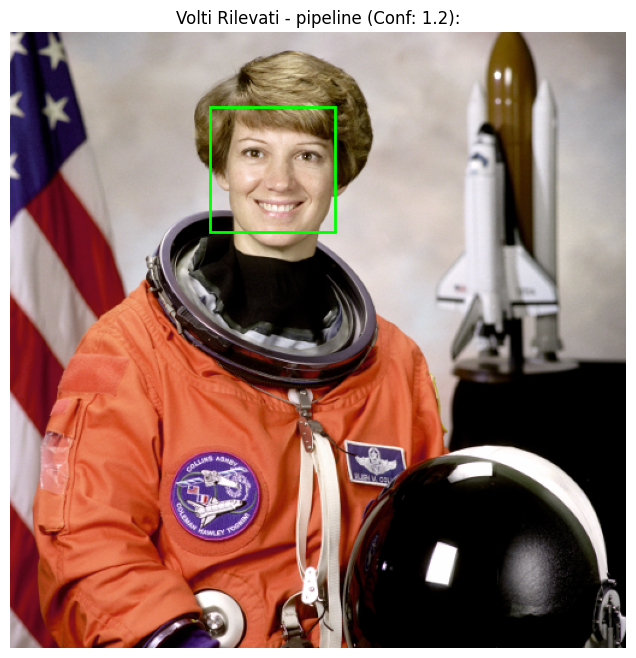


Coordinate dei volti rilevati nell'immagine(Conf: 1.2):
  Volto 1: x1=166, y1=62, x2=270, y2=166 (larghezza: 104, altezza: 104)


In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

NOTA PER IL LETTORE: i molteplici print sono di debug inseriti all'interno del metodo transform della classe HOGTransformer e all'interno del ciclo di detect_faces. Possono essere eliminati ma li lascio in modo da rilevare eventuali errori con altre immagini